In [52]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
# from fim import arules
from operator import attrgetter
import matplotlib.colors as mcolors
import matplotlib.ticker as tkr
from scipy import stats
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

# In this notebook we are going to explore the characteristics of the customers and how they affect their churn rate. The final goal is to identify pottential patterns that are more likely to cause churning, or to learn to identify customers who are included in that 'danger' group, so that we can finally target those customers in an effective way to prevent them leaving the company and maintain a low churn rate.

In [7]:
data = pd.read_csv("../data/data_cleaned.csv")

In [8]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,False
7028,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,False
7029,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,False
7030,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,True


In [9]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Analysis

## Customer Demographics
## ------------------------------------------------------

### Gender Analysis

In [10]:
gender_group=data.groupby('gender')
gender_churn_percentage= gender_group['Churn'].mean()*100

In [11]:
gender_churn_percentage= gender_churn_percentage.reset_index()
gender_churn_percentage

,gender,Churn
0,Female,26.959518
1,Male,26.204565


<Axes: xlabel='gender', ylabel='Churn'>

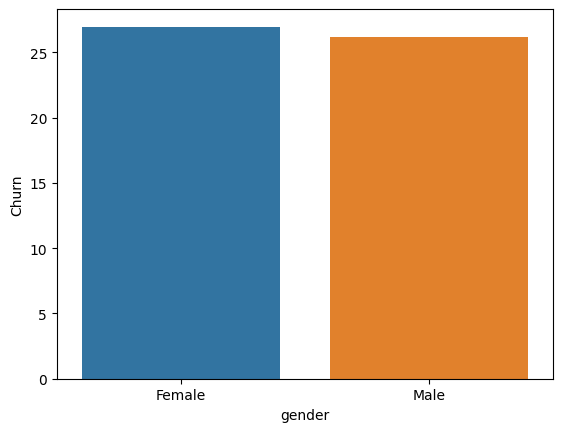

In [13]:
sns.barplot(x=gender_churn_percentage['gender'], y=gender_churn_percentage['Churn'], hue= gender_churn_percentage['gender'])

In [14]:
churn = data['Churn'].astype(int)  # Convert 'Churn' to numeric (assuming binary: 0 or 1)
gender = data['gender'].map({'Female': 0, 'Male': 1})  # Map 'gender' to numeric values

correlation, p_value = stats.pointbiserialr(churn, gender)
print("Correlation:", correlation)
print("p-value:", p_value)

Correlation: -0.0085446432249463
p-value: 0.47373573732076896


### Seniority Analysis

In [15]:
senior_group= data.groupby('SeniorCitizen')
senior_churn_percentage= senior_group['Churn'].mean()*100

In [16]:
churn = data['Churn'].astype(int)  # Convert 'Churn' to numeric (assuming binary: 0 or 1)
senior = data['SeniorCitizen'].map({'No': 0, 'Yes': 1})  # Map 'senior' to numeric values

correlation, p_value = stats.pointbiserialr(churn, senior)
print("Correlation:", correlation)
print("p-value:", p_value)

Correlation: 0.15054105341568247
p-value: 6.3772947115836e-37


In [17]:
senior_churn_percentage =senior_churn_percentage.reset_index()
senior_churn_percentage

,SeniorCitizen,Churn
0,No,23.650255
1,Yes,41.681261


<Axes: xlabel='SeniorCitizen', ylabel='Churn'>

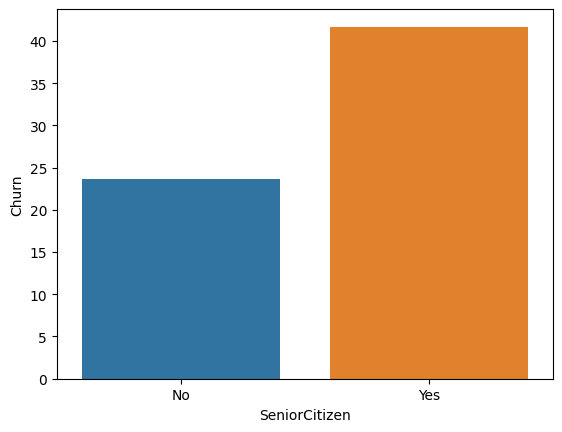

In [18]:
sns.barplot(x= senior_churn_percentage['SeniorCitizen'], y= senior_churn_percentage['Churn'], hue= senior_churn_percentage['SeniorCitizen'])

### Partner Analysis

In [19]:
partner_group= data.groupby('Partner')
partner_churn_percentage= partner_group['Churn'].mean()*100

In [20]:
partner_churn_percentage= partner_churn_percentage.reset_index()
partner_churn_percentage

,Partner,Churn
0,No,32.976092
1,Yes,19.717065


<Axes: xlabel='Partner', ylabel='Churn'>

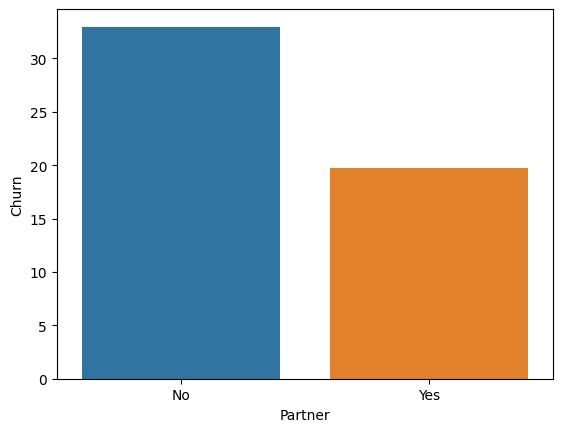

In [21]:
sns.barplot(x= partner_churn_percentage['Partner'], y= partner_churn_percentage['Churn'], hue= partner_churn_percentage['Partner'])

In [22]:
churn = data['Churn'].astype(int)  # Convert 'Churn' to numeric (assuming binary: 0 or 1)
partner = data['Partner'].map({'No': 0, 'Yes': 1})  # Map 'partner' to numeric values

correlation, p_value = stats.pointbiserialr(churn, partner)
print("Correlation:", correlation)
print("p-value:", p_value)

Correlation: -0.14998192562006132
p-value: 1.1712904936164382e-36


### Dependents Analysis

In [23]:
dependents_group_churn_percentage= data.groupby('Dependents')['Churn'].mean()*100
dependents_group_churn_percentage=dependents_group_churn_percentage.reset_index()
dependents_group_churn_percentage

,Dependents,Churn
0,No,31.279140
1,Yes,15.531205


<Axes: xlabel='Dependents', ylabel='Churn'>

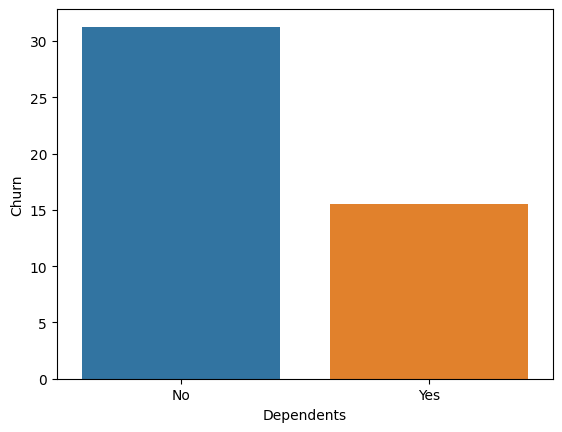

In [24]:
sns.barplot(x= dependents_group_churn_percentage['Dependents'], y= dependents_group_churn_percentage['Churn'], hue= dependents_group_churn_percentage['Dependents'])

In [26]:
churn = data['Churn'].astype(int)  # Convert 'Churn' to numeric (assuming binary: 0 or 1)
dependent = data['Dependents'].map({'No': 0, 'Yes': 1})  # Map 'depentend' to numeric values

correlation, p_value = stats.pointbiserialr(churn, dependent)
print("Correlation:", correlation)
print("p-value:", p_value)

Correlation: -0.16312843938822205
p-value: 3.896536305260066e-43


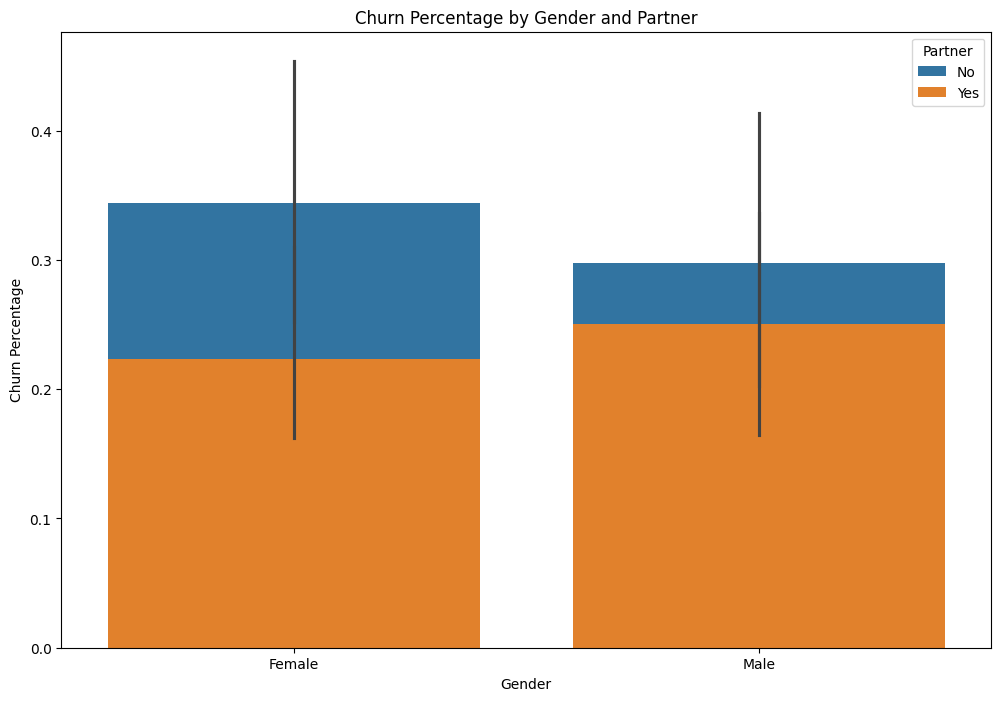

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by different categories
grouped_data = data.groupby(['gender', 'Partner', 'Dependents', 'SeniorCitizen'])['Churn'].mean().reset_index()

# Create a single bar plot
plt.figure(figsize=(12, 8))

# Plot the bar chart with hue parameter
sns.barplot(data=grouped_data, x='gender', y='Churn', hue='Partner', dodge=False)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Gender and Partner')

# Display the plot
plt.show()


## Assossiation with company
## ---------------------------------------------

### Tenure Analysis

<Axes: xlabel='tenure', ylabel='Count'>

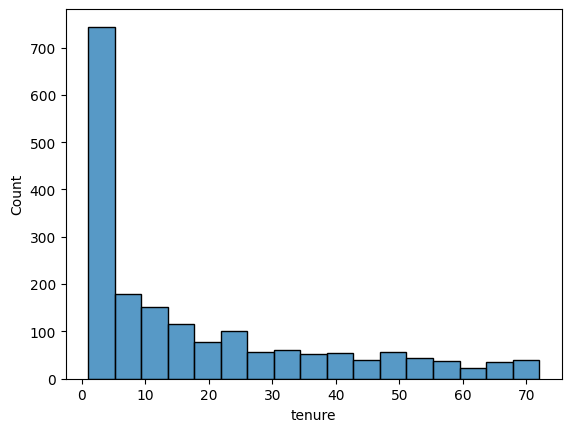

In [29]:
sns.histplot(data[data['Churn']==True]['tenure'])

<Axes: xlabel='tenure', ylabel='Count'>

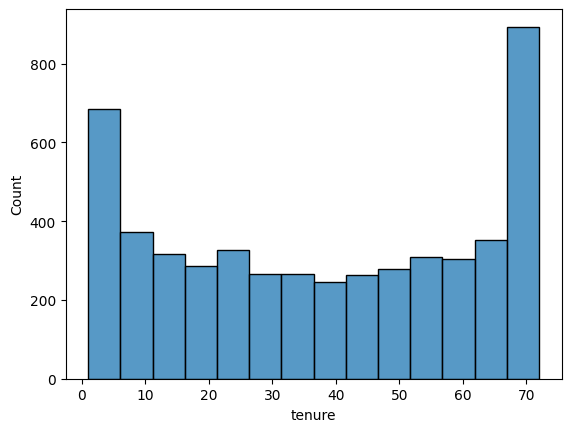

In [30]:
sns.histplot(data[data['Churn']==False]['tenure'])

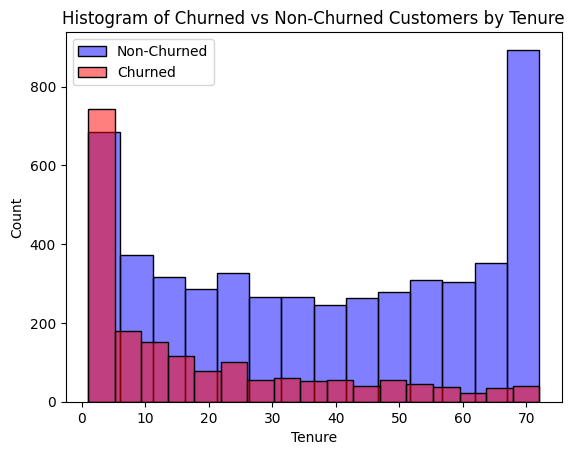

In [31]:
# Create two subsets of data for churned and non-churned customers
churned_customers = data[data['Churn'] == True]
non_churned_customers = data[data['Churn'] == False]

sns.histplot(data=non_churned_customers, x='tenure', label='Non-Churned', color='blue', alpha=0.5)
sns.histplot(data=churned_customers, x='tenure', label='Churned', color='red' ,alpha=0.5)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Histogram of Churned vs Non-Churned Customers by Tenure')
plt.legend()
plt.show()

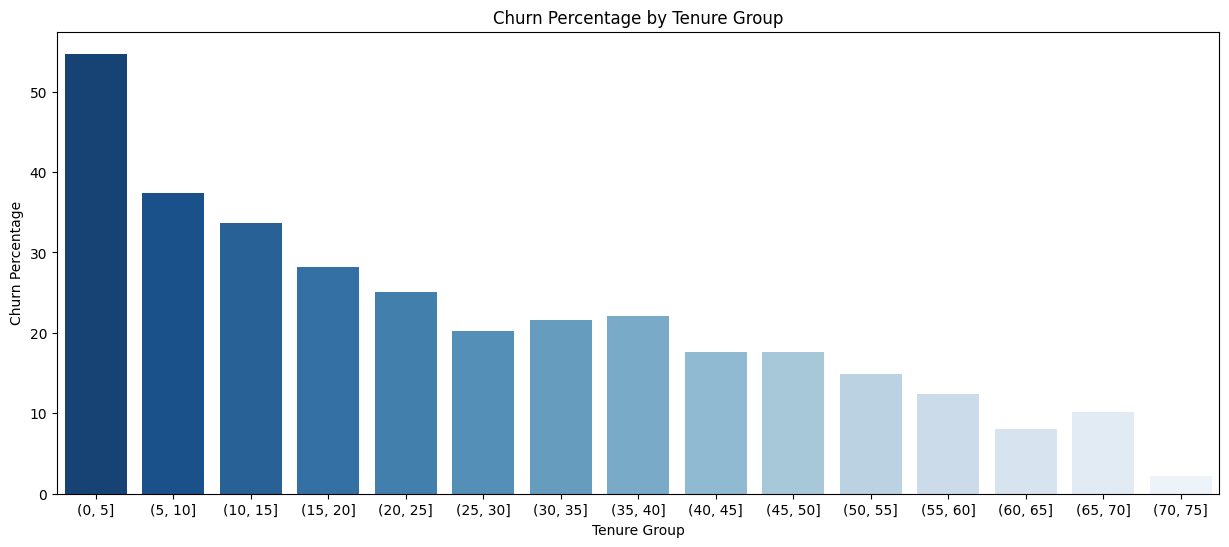

In [32]:
bins = range(0, 80, 5)

# Group tenure into bins
data['tenure_group'] = pd.cut(data['tenure'], bins=bins)

plt.figure(figsize=(15, 6))

# Calculate the churn percentage for each tenure group
churn_percentage = (data.groupby('tenure_group')['Churn'].mean() * 100).reset_index()

# Define a color palette
colors = sns.color_palette('Blues_r', len(churn_percentage))

# Plot the bar chart with the color palette
sns.barplot(x='tenure_group', y='Churn', data=churn_percentage, palette=colors)

# Set labels and title
plt.xlabel('Tenure Group')
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Tenure Group')

# Display the plot
plt.show()

### Phone Service Analysis

In [34]:
phone_service_churn_percentage=data.groupby('PhoneService')['Churn'].mean()*100
phone_service_churn_percentage= phone_service_churn_percentage.reset_index()
phone_service_churn_percentage

,PhoneService,Churn
0,No,25.000000
1,Yes,26.747481


<Axes: xlabel='PhoneService', ylabel='Churn'>

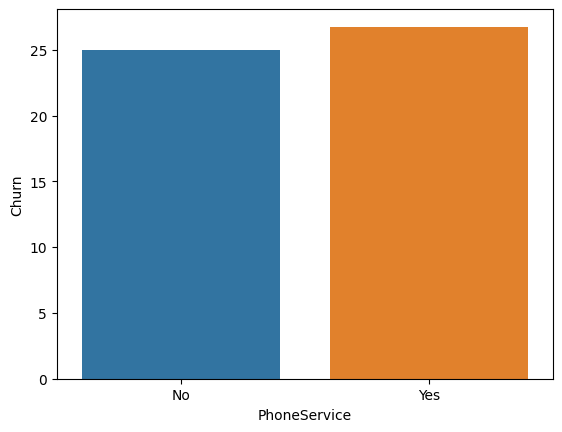

In [35]:
sns.barplot(x=phone_service_churn_percentage['PhoneService'], y= phone_service_churn_percentage['Churn'], hue=phone_service_churn_percentage['PhoneService'] )

In [37]:
churn = data['Churn'].astype(int)  # Convert 'Churn' to numeric (assuming binary: 0 or 1)
phoneservice = data['PhoneService'].map({'No': 0, 'Yes': 1})  # Map 'phoneservice' to numeric values

correlation, p_value = stats.pointbiserialr(churn, phoneservice)
print("Correlation:", correlation)
print("p-value:", p_value)

Correlation: 0.011691398865421993
p-value: 0.3269552813548165


### Multiple Line Connection Analysis

In [38]:
multiple_phone_lines_churn_percentage=data.groupby('MultipleLines')['Churn'].mean()*100
multiple_phone_lines_churn_percentage= multiple_phone_lines_churn_percentage.reset_index()
multiple_phone_lines_churn_percentage

,MultipleLines,Churn
0,No,25.081241
1,No phone service,25.000000
2,Yes,28.648466


<Axes: xlabel='MultipleLines', ylabel='Churn'>

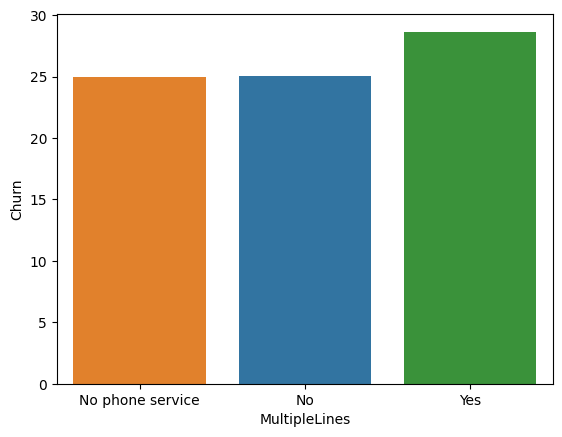

In [39]:
sns.barplot(x= multiple_phone_lines_churn_percentage['MultipleLines'], y= multiple_phone_lines_churn_percentage['Churn']
           ,order= ['No phone service','No', 'Yes']
           ,hue=multiple_phone_lines_churn_percentage['MultipleLines'] )

In [40]:
churn = data['Churn'].astype(int)  # Convert 'Churn' to numeric (assuming binary: 0 or 1)
multilines = data['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 2})  # Map 'multilines' to numeric values

correlation, p_value = stats.pointbiserialr(churn, multilines)
print("Correlation:", correlation)
print("p-value:", p_value)

Correlation: 0.019609134312153952
p-value: 0.10012883740625848


### Internet Service Analysis

In [41]:
internet_service_churn_percentage= data.groupby('InternetService')['Churn'].mean()*100
internet_service_churn_percentage= internet_service_churn_percentage.reset_index()
internet_service_churn_percentage

,InternetService,Churn
0,DSL,18.998344
1,Fiber optic,41.892765
2,No,7.434211


<Axes: xlabel='InternetService', ylabel='Churn'>

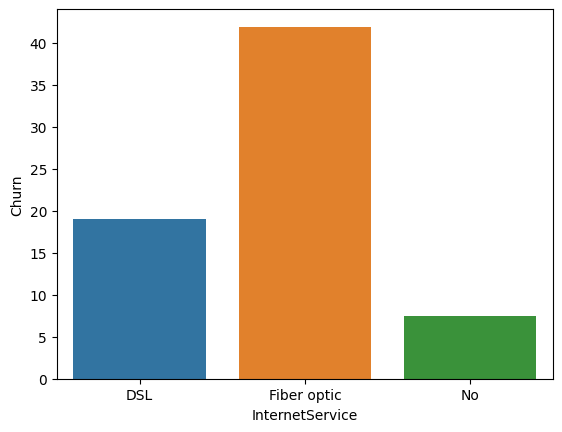

In [42]:
sns.barplot(x= internet_service_churn_percentage['InternetService'], y= internet_service_churn_percentage['Churn'], hue= internet_service_churn_percentage['InternetService'])

### Online Security Analysis

In [43]:
online_security_churn_percentage= data.groupby('OnlineSecurity')['Churn'].mean()*100
online_security_churn_percentage= online_security_churn_percentage.reset_index()
online_security_churn_percentage

,OnlineSecurity,Churn
0,No,41.778667
1,No internet service,7.434211
2,Yes,14.640199


<Axes: xlabel='OnlineSecurity', ylabel='Churn'>

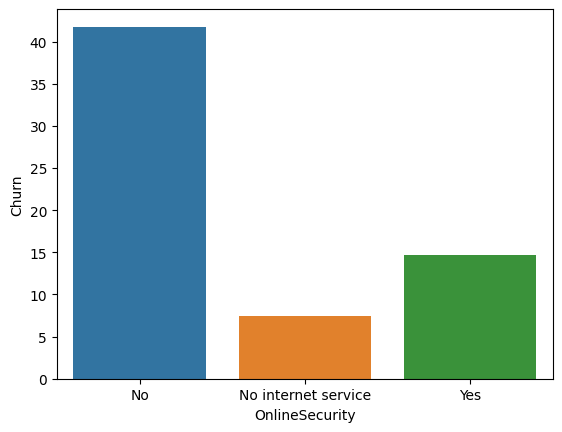

In [44]:
sns.barplot(x= online_security_churn_percentage['OnlineSecurity'], y= online_security_churn_percentage['Churn'], hue= online_security_churn_percentage['OnlineSecurity'])

### Online Backup Analysis

In [45]:
online_backup_churn_percentage= data.groupby('OnlineBackup')['Churn'].mean()*100
online_backup_churn_percentage = online_backup_churn_percentage.reset_index()
online_backup_churn_percentage

,OnlineBackup,Churn
0,No,39.941691
1,No internet service,7.434211
2,Yes,21.567010


<Axes: xlabel='OnlineBackup', ylabel='Churn'>

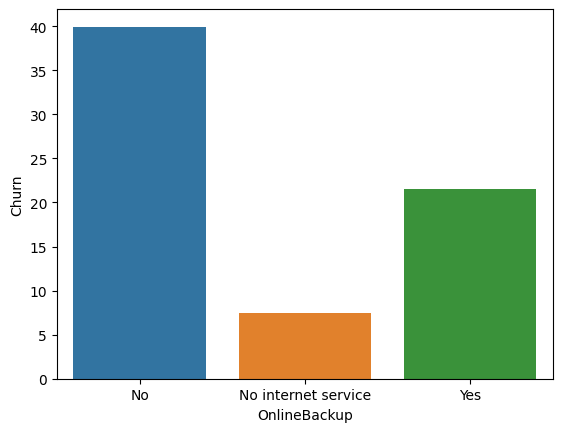

In [46]:
sns.barplot(x= online_backup_churn_percentage['OnlineBackup'], y= online_backup_churn_percentage['Churn'],hue=online_backup_churn_percentage['OnlineBackup'])

### Device Protection Analysis

In [58]:
DeviceProtection_churn_percentage= data.groupby('DeviceProtection')['Churn'].mean()*100
DeviceProtection_churn_percentage = DeviceProtection_churn_percentage.reset_index()
DeviceProtection_churn_percentage

,DeviceProtection,Churn
0,No,39.140271
1,No internet service,7.434211
2,Yes,22.539289


<Axes: xlabel='DeviceProtection', ylabel='Churn'>

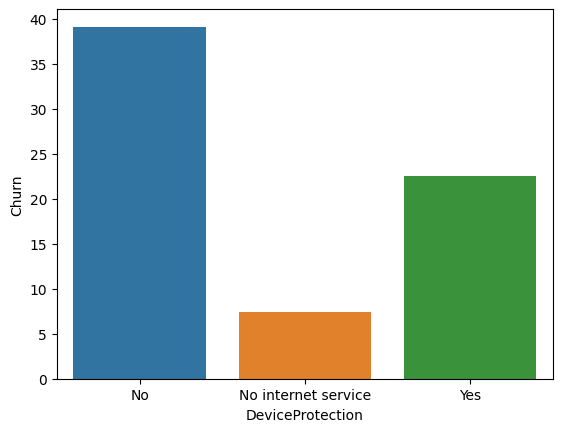

In [59]:
sns.barplot(x= DeviceProtection_churn_percentage['DeviceProtection'], y= DeviceProtection_churn_percentage['Churn'],hue=DeviceProtection_churn_percentage['DeviceProtection'])

### Tech Support Analysis

In [60]:
TechSupport_churn_percentage= data.groupby('TechSupport')['Churn'].mean()*100
TechSupport_churn_percentage = TechSupport_churn_percentage.reset_index()
TechSupport_churn_percentage

,TechSupport,Churn
0,No,41.647465
1,No internet service,7.434211
2,Yes,15.196078


<Axes: xlabel='TechSupport', ylabel='Churn'>

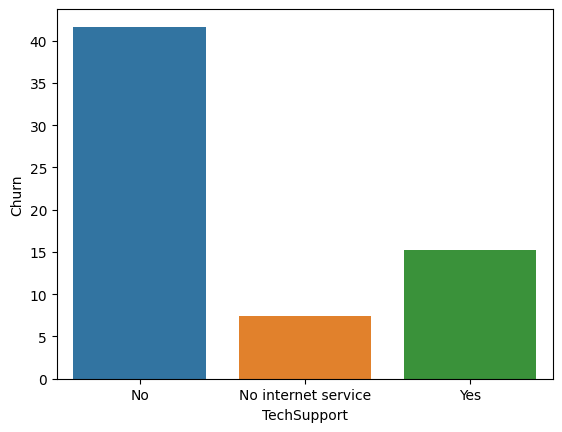

In [61]:
sns.barplot(x= TechSupport_churn_percentage['TechSupport'], y= TechSupport_churn_percentage['Churn'],hue=TechSupport_churn_percentage['TechSupport'])

### Streaming TV Analysis

In [62]:
StreamingTV_churn_percentage= data.groupby('StreamingTV')['Churn'].mean()*100
StreamingTV_churn_percentage = StreamingTV_churn_percentage.reset_index()
StreamingTV_churn_percentage

,StreamingTV,Churn
0,No,33.535066
1,No internet service,7.434211
2,Yes,30.114687


<Axes: xlabel='StreamingTV', ylabel='Churn'>

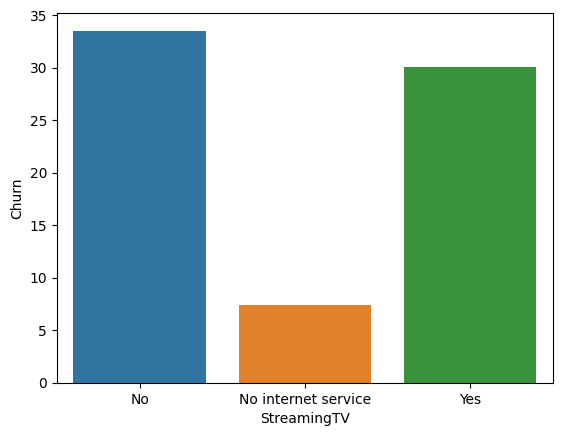

In [63]:
sns.barplot(x= StreamingTV_churn_percentage['StreamingTV'], y= StreamingTV_churn_percentage['Churn'],hue=StreamingTV_churn_percentage['StreamingTV'])

### Streaming Movies Analysis

In [64]:
StreamingMovies_churn_percentage= data.groupby('StreamingMovies')['Churn'].mean()*100
StreamingMovies_churn_percentage = StreamingMovies_churn_percentage.reset_index()
StreamingMovies_churn_percentage

,StreamingMovies,Churn
0,No,33.728875
1,No internet service,7.434211
2,Yes,29.952398


<Axes: xlabel='StreamingMovies', ylabel='Churn'>

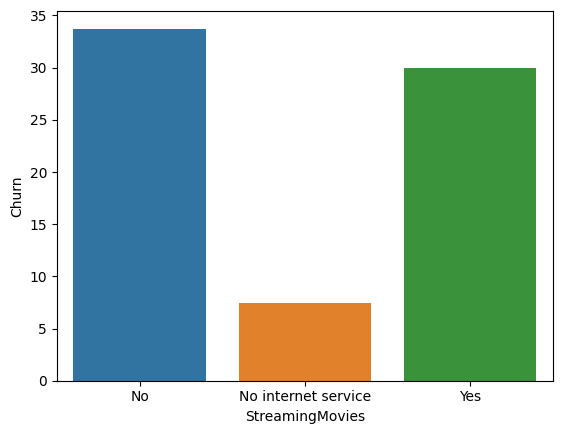

In [65]:
sns.barplot(x= StreamingMovies_churn_percentage['StreamingMovies'], y= StreamingMovies_churn_percentage['Churn'],hue=StreamingMovies_churn_percentage['StreamingMovies'])

## Contract & Payment information
## ---------------------------------------------

###  Contract Analysis

In [66]:
Contract_churn_percentage= data.groupby('Contract')['Churn'].mean()*100
Contract_churn_percentage = Contract_churn_percentage.reset_index()
Contract_churn_percentage

,Contract,Churn
0,Month-to-month,42.709677
1,One year,11.277174
2,Two year,2.848665


<Axes: xlabel='Contract', ylabel='Churn'>

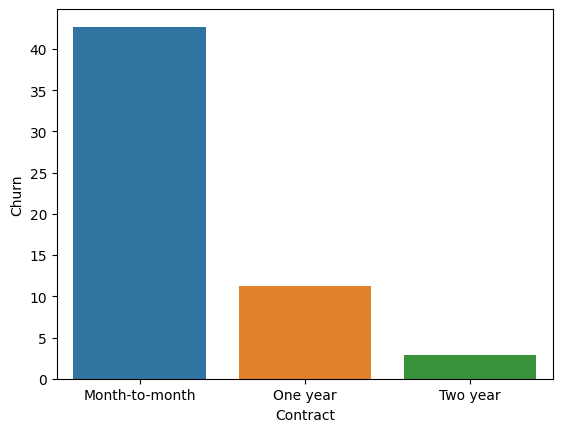

In [67]:
sns.barplot(x= Contract_churn_percentage['Contract'], y= Contract_churn_percentage['Churn'],hue=Contract_churn_percentage['Contract'])

### Paperless Billing Analysis

In [68]:
PaperlessBilling_churn_percentage= data.groupby('PaperlessBilling')['Churn'].mean()*100
PaperlessBilling_churn_percentage = PaperlessBilling_churn_percentage.reset_index()
PaperlessBilling_churn_percentage

,PaperlessBilling,Churn
0,No,16.375698
1,Yes,33.589251


<Axes: xlabel='PaperlessBilling', ylabel='Churn'>

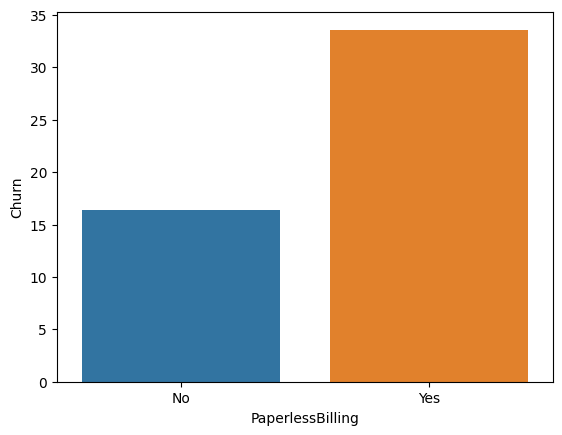

In [69]:
sns.barplot(x= PaperlessBilling_churn_percentage['PaperlessBilling'], y= PaperlessBilling_churn_percentage['Churn'],hue=PaperlessBilling_churn_percentage['PaperlessBilling'])

### Payment Method Analysis 

In [70]:
PaymentMethod_churn_percentage= data.groupby('PaymentMethod')['Churn'].mean()*100
PaymentMethod_churn_percentage = PaymentMethod_churn_percentage.reset_index()
PaymentMethod_churn_percentage

,PaymentMethod,Churn
0,Bank transfer (automatic),16.731518
1,Credit card (automatic),15.253123
2,Electronic check,45.285412
3,Mailed check,19.201995


<Axes: xlabel='PaymentMethod', ylabel='Churn'>

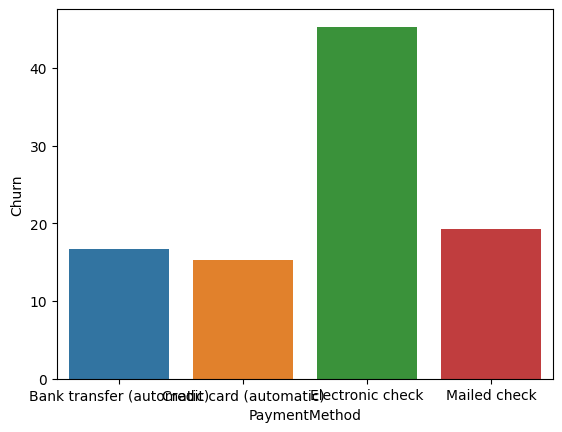

In [75]:
sns.barplot(x= PaymentMethod_churn_percentage['PaymentMethod'], y= PaymentMethod_churn_percentage['Churn'],hue=PaymentMethod_churn_percentage['PaymentMethod'])

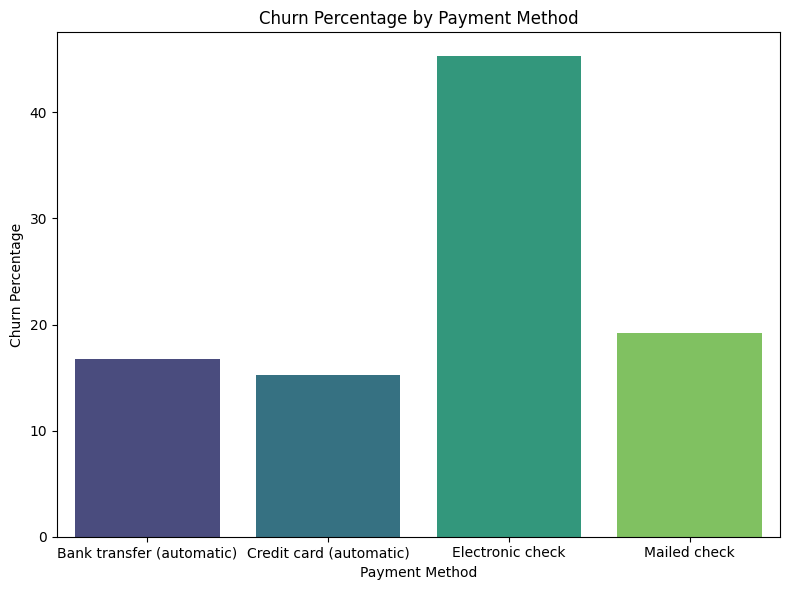

In [83]:
plt.figure(figsize=(8, 6))

sns.barplot(x='PaymentMethod', y='Churn', hue='PaymentMethod', data=PaymentMethod_churn_percentage, palette='viridis', ci=None)
plt.xlabel('Payment Method')
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Payment Method')
# plt.xticks(rotation=20)  

plt.tight_layout()
plt.show()


### Monthly Charges Analysis

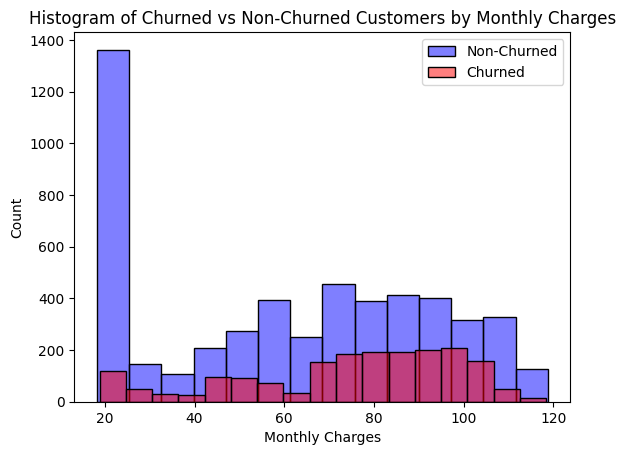

In [85]:
churned_customers = data[data['Churn'] == True]
non_churned_customers = data[data['Churn'] == False]

sns.histplot(data=non_churned_customers, x='MonthlyCharges', label='Non-Churned', color='blue', alpha=0.5)
sns.histplot(data=churned_customers, x='MonthlyCharges', label='Churned', color='red' ,alpha=0.5)
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Histogram of Churned vs Non-Churned Customers by Monthly Charges')
plt.legend()
plt.show()

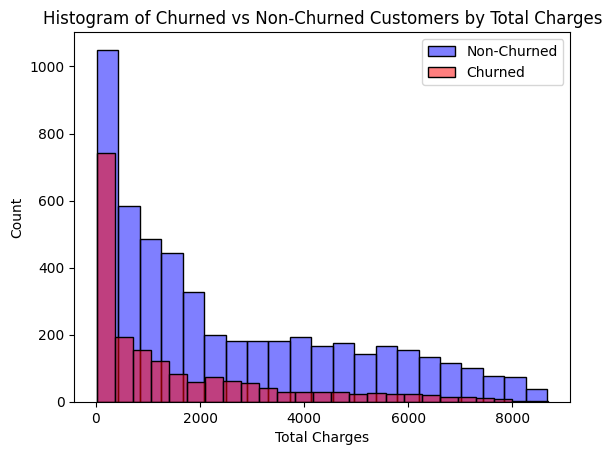

In [86]:
churned_customers = data[data['Churn'] == True]
non_churned_customers = data[data['Churn'] == False]

sns.histplot(data=non_churned_customers, x='TotalCharges', label='Non-Churned', color='blue', alpha=0.5)
sns.histplot(data=churned_customers, x='TotalCharges', label='Churned', color='red' ,alpha=0.5)
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.title('Histogram of Churned vs Non-Churned Customers by Total Charges')
plt.legend()
plt.show()

# Correlation attempts

In [49]:
correlation= data.corrwith(data['Churn'])

In [50]:
correlation

tenure           -0.354049
MonthlyCharges    0.192858
TotalCharges     -0.199484
Churn             1.000000
dtype: float64

<Axes: >

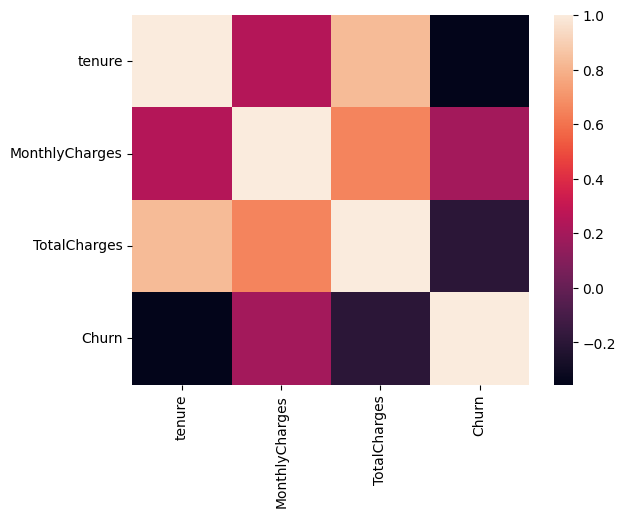

In [87]:
sns.heatmap(data.corr())

In [51]:
data2= data.copy()

In [53]:
le = LabelEncoder()
data2 = data2.apply(le.fit_transform)
data2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,0,1,0,0,2,...,0,0,0,0,1,2,142,74,0,0
1,1,0,0,0,33,1,0,0,2,0,...,0,0,0,1,0,3,497,3624,0,6
2,1,0,0,0,1,1,0,0,2,2,...,0,0,0,0,1,3,435,536,1,0
3,1,0,0,0,44,0,1,0,2,0,...,2,0,0,1,0,0,266,3570,0,8
4,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,2,728,674,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,23,1,2,0,2,0,...,2,2,2,1,1,3,990,3700,0,4
7028,0,0,1,1,71,1,2,1,0,2,...,0,2,2,1,1,1,1339,6304,0,14
7029,0,0,1,1,10,0,1,0,2,0,...,0,0,0,0,1,2,137,1265,0,2
7030,1,1,1,0,3,1,2,1,0,0,...,0,0,0,0,1,3,794,1157,1,0


In [54]:
correlations = data2.corrwith(data2['Churn'])
correlations

gender             -0.008545
SeniorCitizen       0.150541
Partner            -0.149982
Dependents         -0.163128
tenure             -0.354049
PhoneService        0.011691
MultipleLines       0.038043
InternetService    -0.047097
OnlineSecurity     -0.289050
OnlineBackup       -0.195290
DeviceProtection   -0.177883
TechSupport        -0.282232
StreamingTV        -0.036303
StreamingMovies    -0.038802
Contract           -0.396150
PaperlessBilling    0.191454
PaymentMethod       0.107852
MonthlyCharges      0.182989
TotalCharges       -0.230843
Churn               1.000000
tenure_group       -0.351312
dtype: float64

<Axes: >

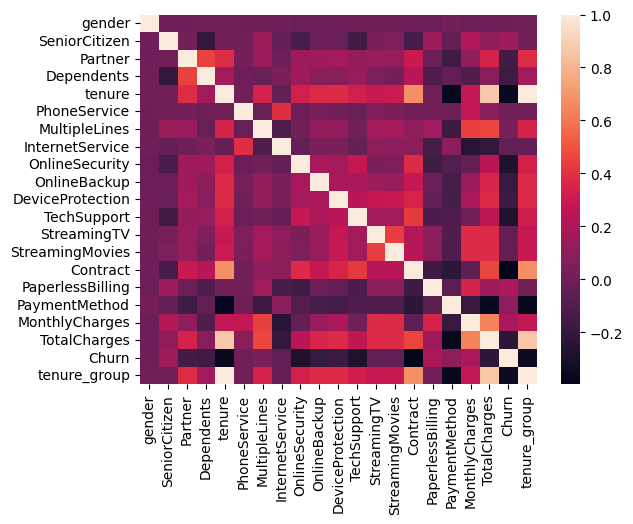

In [88]:
sns.heatmap(data2.corr())